In [2]:
import sys, os
if os.path.exists("/home/cb2714/wwa/wwa.py"): 
     sys.path.append('/home/cb2714/wwa/')
else:
     sys.path.append('/rds/general/user/cb2714/home/wwa/')
from wwa import *

from datetime import timedelta

mapproj = cartopy.crs.PlateCarree()

warnings.filterwarnings("ignore", category = FutureWarning)

# Change in seasonal cycle in HighResMIP

In [64]:
varnm = "tasmin"
fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/Central-asia-heat/highresmip/ts-"+varnm+"/"

In [65]:
fl = sorted(glob.glob(fpath+"*"))

days = pd.date_range(start = "2020-01-01", end = "2021-01-01")
labelticks = [i+1 for i in range(367) if (days[i].day) == 15]
labels = [days[i].strftime("%b")[0] for i in range(367) if (days[i].day) == 15]

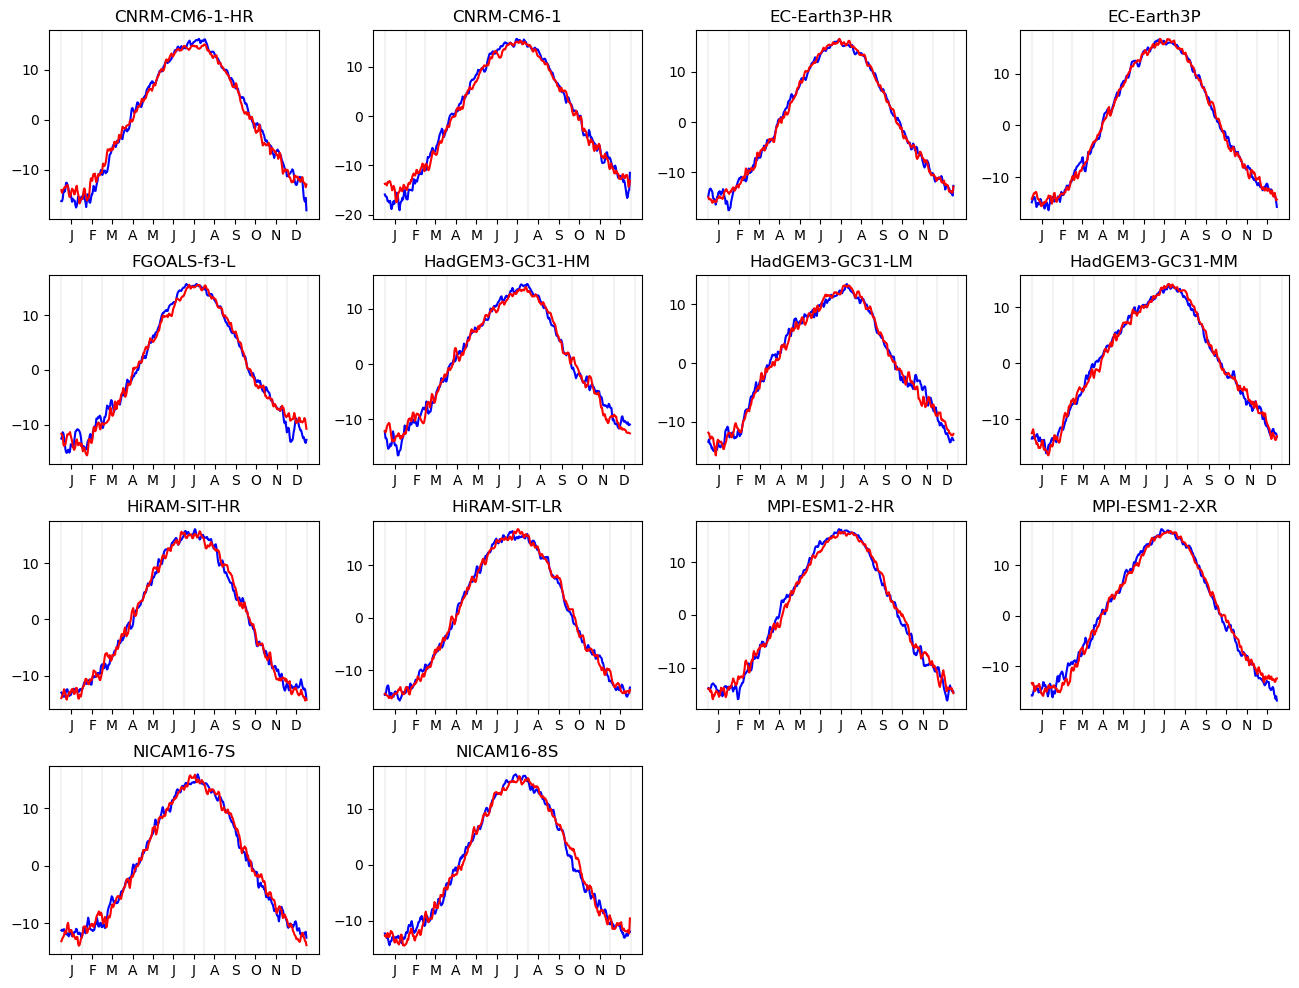

In [67]:
nc = 4; nr = 4
slice1 = slice("1979", "1999"); slice2 = slice("2000", "2020")
# slice1 = slice("1950", "1980"); slice2 = slice("2020", "2050")
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*4,nr*3))
plt.subplots_adjust(hspace = 0.3)

for i in range(len(fl)):
    ax = axs.flatten()[i]
    fnm = fl[i]
    ts = xr.open_dataset(fnm).reset_coords(drop = True)[varnm]
    
    sc_hist = ts.sel(time = slice1).groupby("time.dayofyear").mean()
    sc_now = ts.sel(time = slice2).groupby("time.dayofyear").mean()
    
    sc_hist = sc_hist - sc_hist.mean()
    sc_now = sc_now - sc_now.mean()
    
    ax.plot(sc_hist, color = "blue")
    ax.plot(sc_now, color = "red")
    
    ax.set_title(fnm.split("_")[-5])
    ax.set_xticks(labelticks)
    ax.set_xticklabels(labels)
    [ax.axvline(x, color = "k", alpha = 0.05) for x in range(367) if (days[x].day) == 1]
    
for i in range(len(fl), nc*nr): axs.flatten()[i].set_axis_off()

plt.savefig("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/Central-asia-heat/sc-difference_"+slice1.start+"-"+slice1.stop+"_"+slice2.start+"-"+slice2.stop+"_highresmip_"+varnm+".png")

# Map of change in March temperatures

In [141]:
sf = gpd.read_file("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/Central-asia-heat/region_shapefile/")

In [142]:
tasmax = xr.open_dataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/Central-asia-heat/era5_tmax_daily_55-85E_30-50N_firstyear-lastyear.nc").tmax
tasmin = xr.open_dataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/Central-asia-heat/era5_tmin_daily_55-85E_30-50N_-999-lastyear.nc").tmin

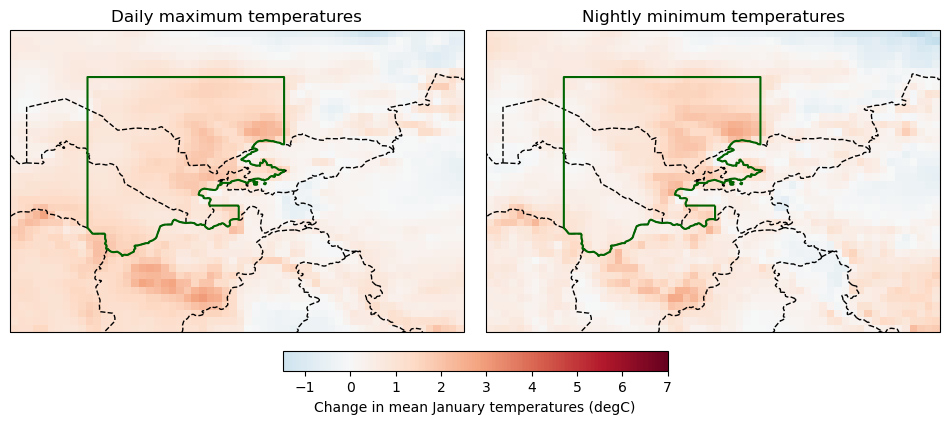

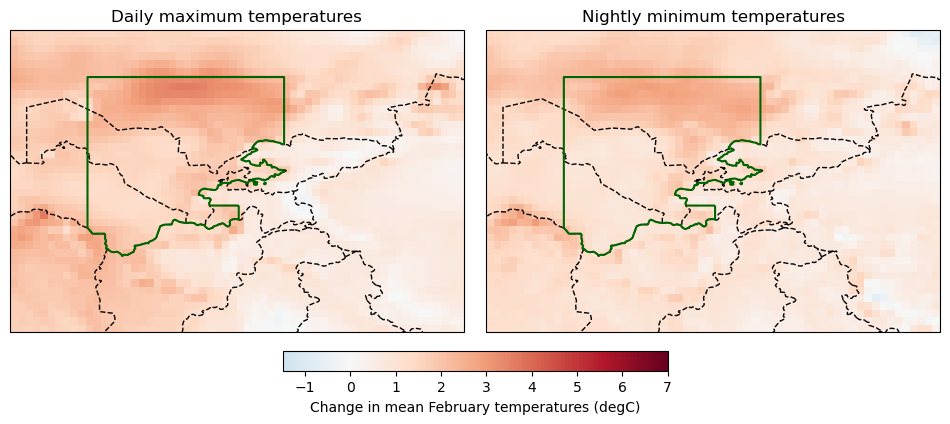

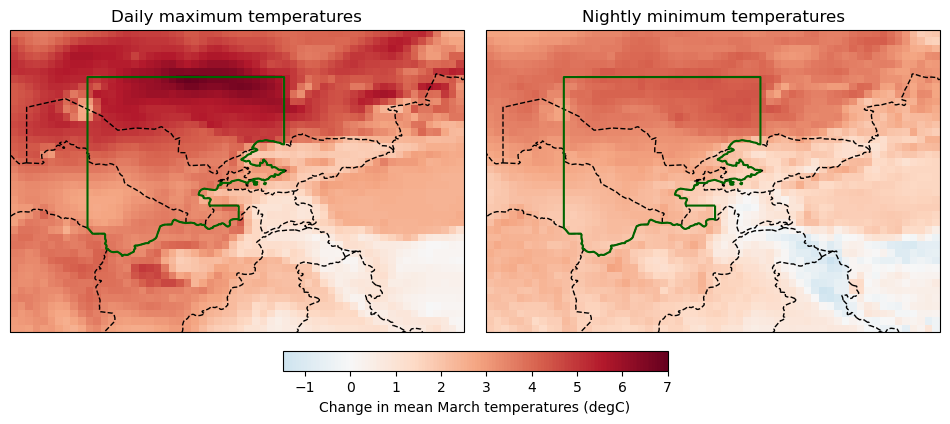

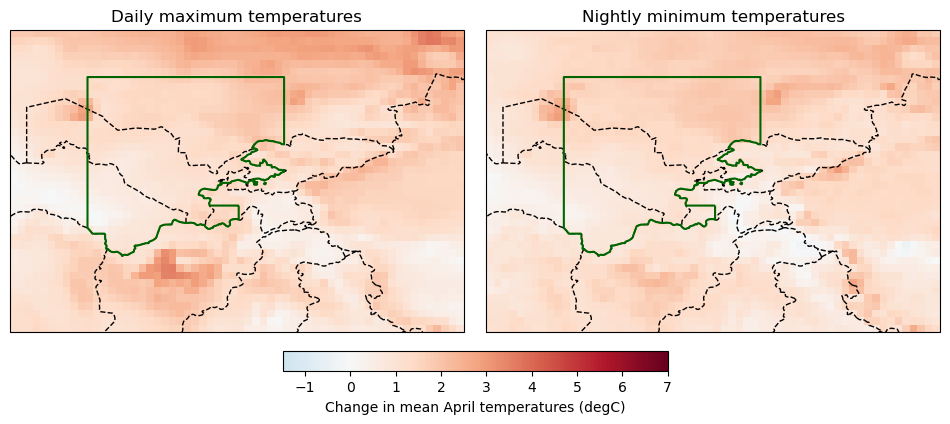

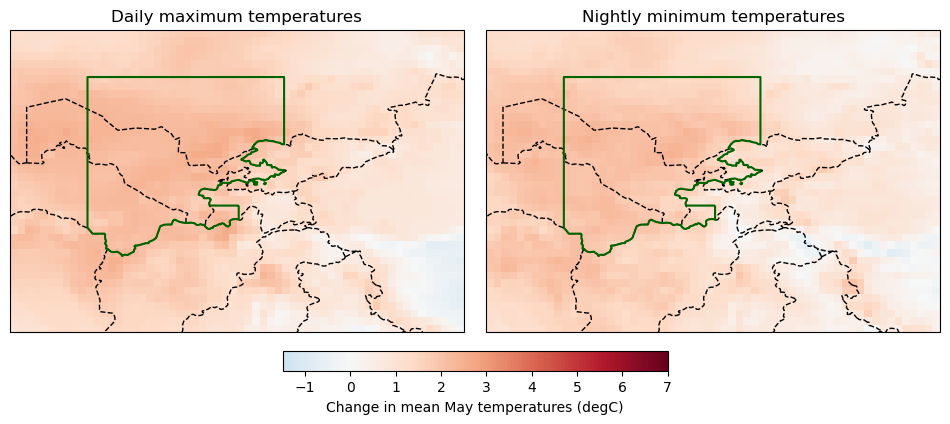

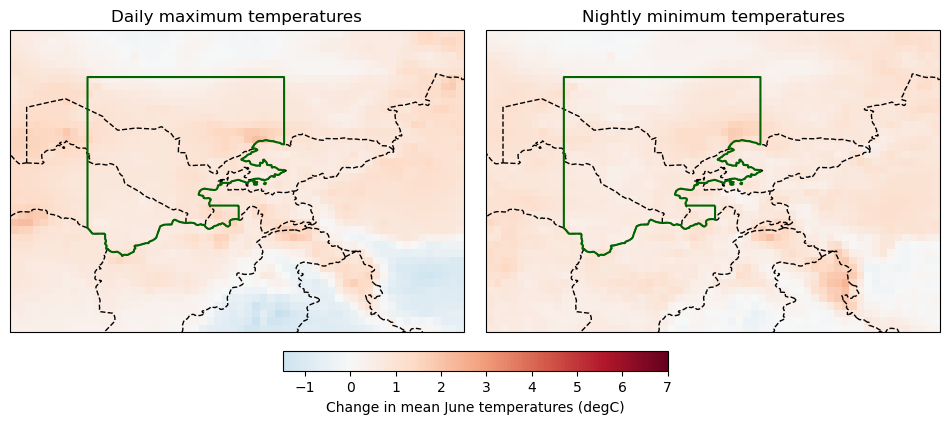

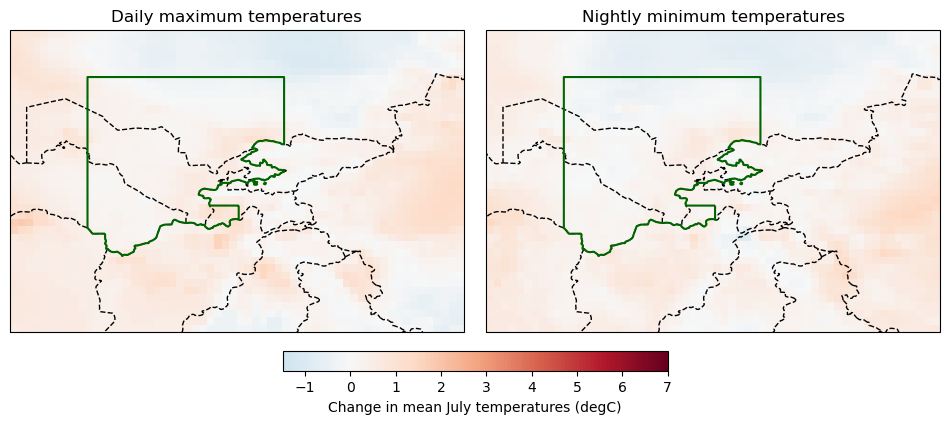

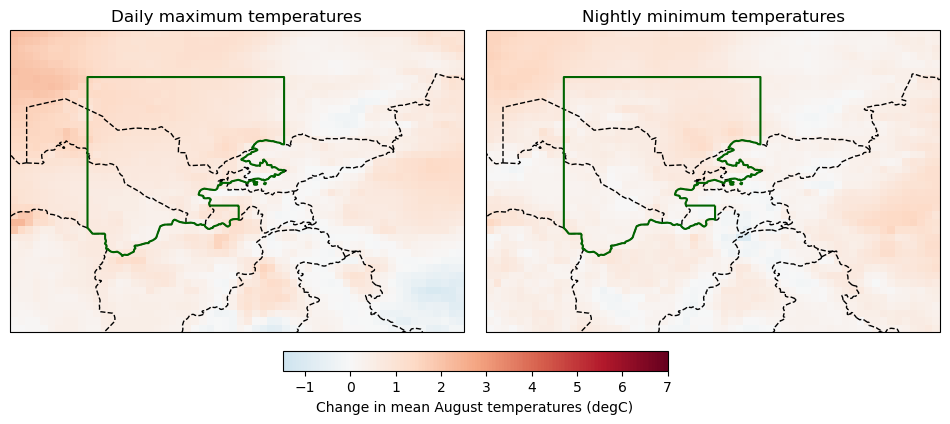

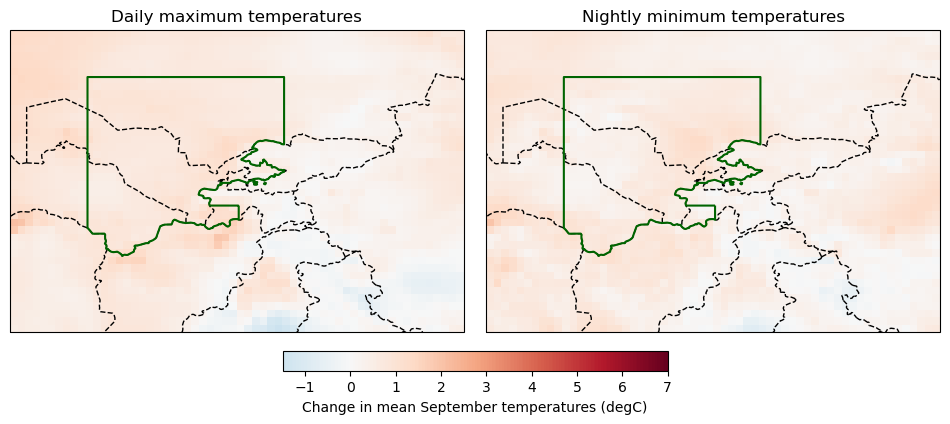

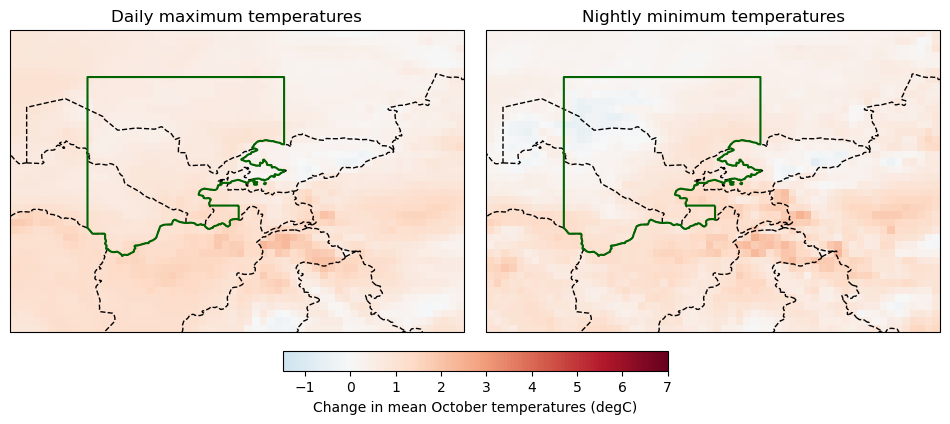

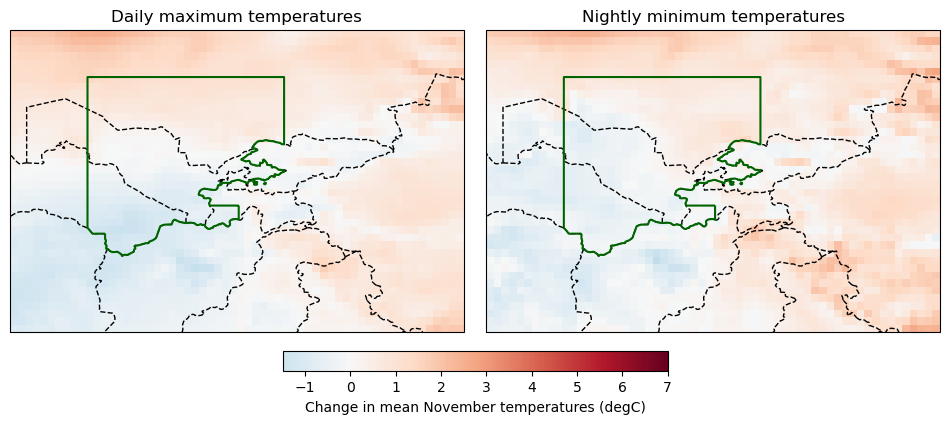

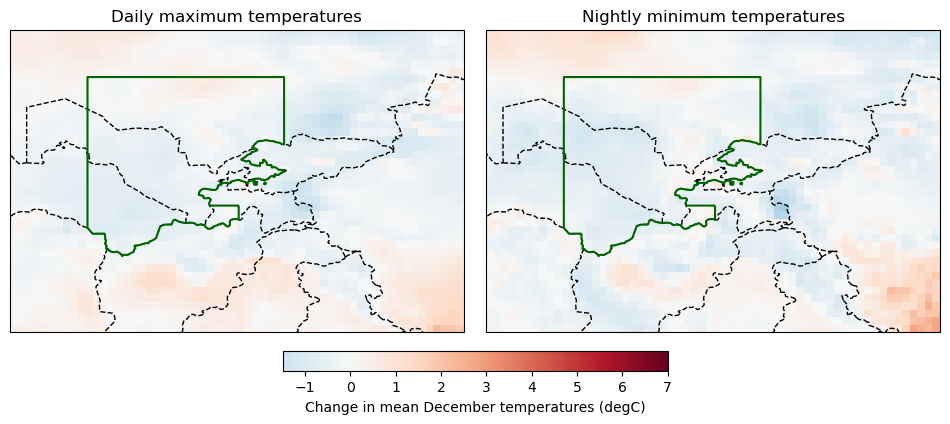

In [150]:
slice1 = slice("1979", "1999"); slice2 = slice("2000", "2020")
for m in range(1,13):

    tmax_diff = tasmax.sel(time = slice2).groupby("time.month")[m].mean("time") - tasmax.sel(time = slice1).groupby("time.month")[m].mean("time")
    tmin_diff = tasmin.sel(time = slice2).groupby("time.month")[m].mean("time") - tasmin.sel(time = slice1).groupby("time.month")[m].mean("time")

    mth = datetime(2000,m,1).strftime("%B")

    fig, axs = plt.subplots(ncols = 2, figsize = (12,5), subplot_kw = {"projection" : mapproj})
    plt.subplots_adjust(wspace = 0.05)
    plot_kwargs = {"cmap" : "RdBu_r", "add_colorbar" : False, "norm" : MidpointNormalize(vmin = -1.5, vmax = 7)}

    cbar = tmax_diff.plot(ax = axs[0], **plot_kwargs)
    tmin_diff.plot(ax = axs[1], **plot_kwargs)

    axs[0].set_title("Daily maximum temperatures")
    axs[1].set_title("Nightly minimum temperatures")

    for ax in axs:
        ax.add_feature(cartopy.feature.BORDERS, color = "k", ls = "--")
        sf.boundary.plot(ax = ax, color = "darkgreen")

    plt.colorbar(cbar, ax = axs, location = "bottom", fraction = 0.05, pad = 0.05, label = "Change in mean "+mth+" temperatures (degC)")
    plt.savefig("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/Central-asia-heat/map-of-"+mth.lower()+"-temp-changes_era5")